# Analysis twitter

In [1]:
import pandas as pd 
import numpy as np 

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.family'] = 'tahoma'

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [2]:
df = pd.read_excel('/Users/admin/Downloads/0101/data_tw_topic.xlsx')

In [3]:
df = df.drop(columns='Unnamed: 0')
df['Engagement'] = df['Retweet count'] + df['Favorite count']
df

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
0,FWPthailand,2019-03-23 09:16:13,2032,2742,เลือก #อนาคตใหม่ อย่าให้ประเทศไทย กลับไปเหมือน...,อนาคตใหม่,เลือก อย่าให้ประเทศไทย กลับไปเหมือนเดิม,ขาย ธนาธร,4774
1,FWPthailand,2019-03-22 17:09:15,3365,2937,ขอขอบคุณทุกท่าน...อย่าลืม 24 มีนากาอนาคตใหม่ อ...,อนาคตใหม่,ขอขอบคุณทุกท่าน อย่าลืม มีนากาอนาคตใหม่ อย่าใ...,นโยบายเศรษฐกิจและภาคใต้,6302
2,FWPthailand,2019-03-22 15:21:36,8662,4627,"""เราคือคนที่ไม่ยอมอยู่ในสังคมที่ไม่เป็นธรรมแบบ...",อนาคตใหม่,เราคือคนที่ไม่ยอมอยู่ในสังคมที่ไม่เป็นธรรมแบบ...,บันทึกการเดินทางของลูกทีมพรรค,13289
3,FWPthailand,2019-03-22 14:59:13,0,0,เราจะเอาการเลือกตั้ง 24 มีนา เป็นเครื่องมือในก...,อนาคตใหม่,เราจะเอาการเลือกตั้ง มีนา เป็นเครื่องมือในการ...,บันทึกการเดินทางของลูกทีมพรรค,0
4,FWPthailand,2019-03-22 14:39:17,727,757,ธนาธร จึงรุ่งเรืองกิจ หัวหน้าพรรคอนาคตใหม่ ขึ้...,อนาคตใหม่,ธนาธร จึงรุ่งเรืองกิจ หัวหน้าพรรคอนาคตใหม่ ขึ้...,บันทึกการเดินทางของลูกทีมพรรค,1484
...,...,...,...,...,...,...,...,...,...
1124,paritw92,2019-02-04 05:18:59,296,383,เบอร์ 8 นะครับ!\n\n(มีผู้สมัครเอกสารไม่ครบ เบอ...,ประชาธิปัตย์,เบอร์ นะครับ มีผู้สมัครเอกสารไม่ครบ เบอร์เลยเ...,หาเสียง น่าจะ กรณ์ พูด,679
1125,paritw92,2019-02-01 08:41:50,463,320,ตั้งใจทำการเมืองอย่างสร้างสรรค์ วันแรกก็โดนซะแ...,ประชาธิปัตย์,ตั้งใจทำการเมืองอย่างสร้างสรรค์ วันแรกก็โดนซะแ...,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,783
1126,RangsimanRome,2019-02-11 11:25:45,86,94,เมื่อ 2 วันก่อน ผมมีโอกาสไปช่วยผู้สมัครลงพื้นท...,อนาคตใหม่,เมื่อ วันก่อน ผมมีโอกาสไปช่วยผู้สมัครลงพื้นที...,แนะนำแกนนำ และดาราของพรรค,180
1127,RangsimanRome,2019-02-08 11:01:23,46,27,#อนาคตใหม่ ไม่เคยเจรจาต่อรองใดๆกับคุณประยุทธ จ...,อนาคตใหม่,ไม่เคยเจรจาต่อรองใดๆกับคุณประยุทธ จันทร์โอชา ...,บันทึกการเดินทางของลูกทีมพรรค,73


In [4]:
cnt_ = df['Party'].value_counts()
cnt_.reset_index()

trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweet in dataset",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweet in dataset according to Party')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [5]:
df['Party'].value_counts()

เศรษฐกิจใหม่           268
อนาคตใหม่              258
พลังประชารัฐ           228
ประชาธิปัตย์           161
เพื่อไทย               157
ชาติไทยพัฒนา            29
รวมพลังประชาชาติไทย     28
Name: Party, dtype: int64

In [6]:
df['Username'].value_counts()

NewEconomicsTH      268
pprpthailand        206
paritw92            148
FWPthailand         130
Thanathorn_FWP       87
sudaratofficiall     79
PheuThaiParty        68
SPiyabutr            38
ChartthaiPT          29
actpartyorg          28
prayutofficial       22
democratTH           12
ThaksinLive          10
RangsimanRome         3
KornGoThailand        1
Name: Username, dtype: int64

In [7]:
cnt_ = df['Username'].value_counts()
cnt_.reset_index()

trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweet in dataset",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweet in dataset according to Username')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [8]:
aa = df.groupby(['Party','Username']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()


In [9]:
aa.sort_values(by='eng_sum',ascending=False)

,Party,Username,count,eng_sum,eng_mean,eng_max
0,อนาคตใหม่,Thanathorn_FWP,87,1304833,14998.080460,142135
1,เพื่อไทย,sudaratofficiall,79,195416,2473.620253,31749
2,อนาคตใหม่,FWPthailand,130,163298,1256.138462,21359
3,เพื่อไทย,ThaksinLive,10,35060,3506.000000,6123
4,ประชาธิปัตย์,paritw92,148,19879,134.317568,2103
5,พลังประชารัฐ,prayutofficial,22,17958,816.272727,2250
6,อนาคตใหม่,SPiyabutr,38,17608,463.368421,5146
7,เศรษฐกิจใหม่,NewEconomicsTH,268,12300,45.895522,1813
8,เพื่อไทย,PheuThaiParty,68,7741,113.838235,927
9,พลังประชารัฐ,pprpthailand,206,5443,26.422330,888


In [10]:
aa.groupby('Party').agg({'eng_sum':'sum'}).sort_values(by='eng_sum',ascending=False)

,eng_sum
Party,
อนาคตใหม่,1486240
เพื่อไทย,238217
พลังประชารัฐ,23401
ประชาธิปัตย์,21340
เศรษฐกิจใหม่,12300
รวมพลังประชาชาติไทย,532
ชาติไทยพัฒนา,41


In [11]:
aa.groupby('Party').agg({'eng_sum':'sum'}).sort_values(by='eng_sum',ascending=False).value_counts()

eng_sum
1486240    1
238217     1
23401      1
21340      1
12300      1
532        1
41         1
dtype: int64

In [12]:
cnt_.index

Index(['NewEconomicsTH', 'pprpthailand', 'paritw92', 'FWPthailand',
       'Thanathorn_FWP', 'sudaratofficiall', 'PheuThaiParty', 'SPiyabutr',
       'ChartthaiPT', 'actpartyorg', 'prayutofficial', 'democratTH',
       'ThaksinLive', 'RangsimanRome', 'KornGoThailand'],
      dtype='object')

In [13]:
cnt_ = aa.groupby('Party').agg({'eng_sum':'sum'}).sort_values(by='eng_sum',ascending=False)

trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_['eng_sum'],
                name = "Number of tweet in dataset",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of engagement in dataset according to Party')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [14]:
trace1 = go.Bar(
                x = aa['Party'],
                y = aa['eng_sum'],
                name = "Number of tweets in dataset according ",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of engagement in dataset according to Party')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [15]:
trace1 = go.Bar(
                x = aa['Party'][aa['Party']!='อนาคตใหม่'],
                y = aa['eng_sum'][aa['Party']!='อนาคตใหม่'],
                name = "Number of tweets in dataset according ",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweet in dataset according to Username')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## ***Topic***

In [16]:
df_act = df[df['Party'] == 'รวมพลังประชาชาติไทย']
df_chartthai = df[df['Party'] == 'ชาติไทยพัฒนา']
df_democrat = df[df['Party'] == 'ประชาธิปัตย์']
df_fwp = df[df['Party'] == 'อนาคตใหม่']
df_neweco = df[df['Party'] == 'เศรษฐกิจใหม่']
df_pt = df[df['Party'] == 'เพื่อไทย']
df_pprp = df[df['Party'] == 'พลังประชารัฐ']
df_pch = df[df['Party'] == 'เพื่อชาติ']
df_sr = df[df['Party'] == 'เสรีรวมไทย']

In [17]:
q = df.groupby(['topic','Party']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()
q

,topic,Party,count,eng_sum,eng_mean,eng_max
0,ขายฝันของพรรค,อนาคตใหม่,53,404825,7638.207547,87239
1,บันทึกการเดินทางของลูกทีมพรรค,อนาคตใหม่,69,318727,4619.231884,117723
2,นโยบายเศรษฐกิจและภาคใต้,อนาคตใหม่,49,260983,5326.183673,61705
3,ขาย ธนาธร,อนาคตใหม่,45,251830,5596.222222,142135
4,แนะนำแกนนำ และดาราของพรรค,อนาคตใหม่,42,249875,5949.404762,85480
5,ทักษิณละนโยบายสำหรับอนาคต,เพื่อไทย,28,66902,2389.357143,31749
6,ความเป็นมืออาชีพในการแก้ปัญหา,เพื่อไทย,19,53711,2826.894737,10960
7,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,เพื่อไทย,29,52793,1820.448276,17854
8,ประชาสัมพันธ์สถานที่ปราศรัย,เพื่อไทย,54,37219,689.240741,21184
9,บรรยากาศการปราศรัย + นโยบาย,เพื่อไทย,27,27592,1021.925926,6123


<AxesSubplot:xlabel='topic'>

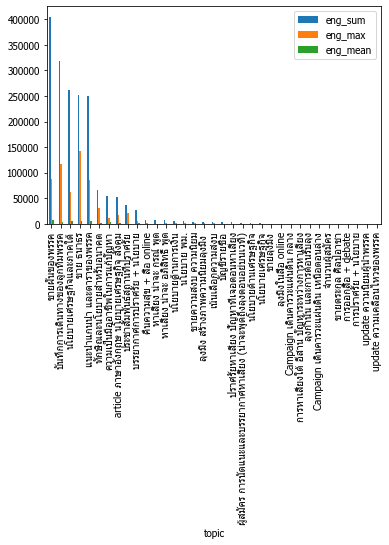

In [18]:
q.plot(x="topic", y=["eng_sum", "eng_max", "eng_mean"], kind="bar")

In [19]:
 def corr(data):
    # calculate the correlation matrix
    correlations = data.corr()

    # plot the correlation matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(correlations,
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        square = True,
        cbar_kws={'label':'correlation'})
    plt.show()

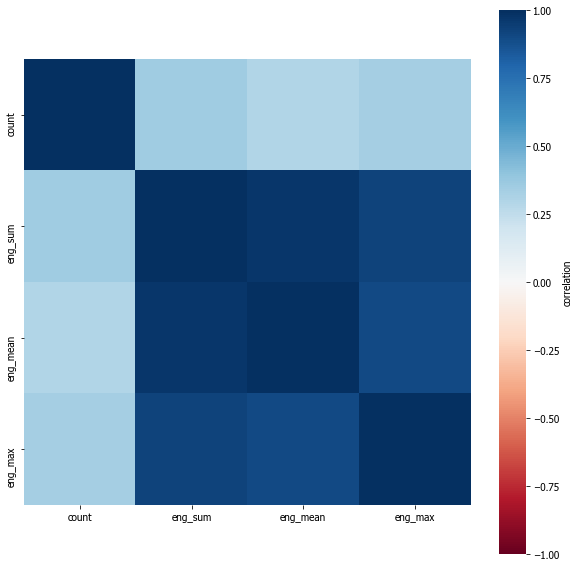

In [20]:
corr(q)


<AxesSubplot:xlabel='topic'>

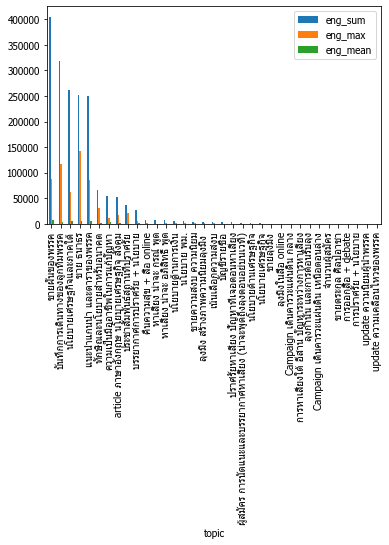

In [21]:
q.plot(x="topic", y=["eng_sum", "eng_max", "eng_mean"], kind="bar")

* ## อนาคตใหม่

In [22]:
df_fwp.sort_values(by='Engagement',ascending=False)

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
822,Thanathorn_FWP,2019-02-09 12:02:25,107244,34891,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,อนาคตใหม่,วันนี้มา มีแต่คนทักผมว่า ไม่ค่อยเก็ทเท่าไหร่ แ...,ขาย ธนาธร,142135
820,Thanathorn_FWP,2019-02-10 10:03:56,90900,26823,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,อนาคตใหม่,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,Thanathorn_FWP,2019-02-13 06:37:10,64128,23111,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,อนาคตใหม่,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,Thanathorn_FWP,2019-03-17 05:53:42,64608,20872,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,อนาคตใหม่,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน ไม่มีใครสั่ง บ...,แนะนำแกนนำ และดาราของพรรค,85480
758,Thanathorn_FWP,2019-03-20 07:15:47,44733,17874,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,อนาคตใหม่,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง ที่ให้โ...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...,...,...,...,...,...,...
787,Thanathorn_FWP,2019-03-04 10:40:11,0,0,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,อนาคตใหม่,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,Thanathorn_FWP,2019-03-04 13:07:06,0,0,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,อนาคตใหม่,ชมตอนนี้ live รายการ select เกาะติดเลือกตั้ง ...,แนะนำแกนนำ และดาราของพรรค,0
785,Thanathorn_FWP,2019-03-05 11:58:38,0,0,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,อนาคตใหม่,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,Thanathorn_FWP,2019-03-05 11:58:45,0,0,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,อนาคตใหม่,standard debat มิติใหม่ของการดีเบต โค้งสุดท้าย...,ขาย ธนาธร,0


In [23]:
#frequency of tweets 
df_fwp['Username'].value_counts()

FWPthailand       130
Thanathorn_FWP     87
SPiyabutr          38
RangsimanRome       3
Name: Username, dtype: int64

In [24]:
df_fwp.loc[:,['Text','topic','Engagement']].sort_values(by='Engagement',ascending=False)

,Text,topic,Engagement
822,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,ขาย ธนาธร,142135
820,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,แนะนำแกนนำ และดาราของพรรค,85480
758,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...
787,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,แนะนำแกนนำ และดาราของพรรค,0
785,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,ขาย ธนาธร,0


In [25]:
#sample tweet with max engagement
df_fwp.Text[822]

'วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่อ ไม่ค่อยเก็ทเท่าไหร่ แต่ก็ขอบคุณทุกกำลังใจ อย่าลืมไปเลือก #อนาคตใหม่ กันนะคับ https://t.co/MzumefW403'

In [26]:
fwp = df_fwp.groupby(['Username','topic']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()
fwp

,Username,topic,count,eng_sum,eng_mean,eng_max
0,Thanathorn_FWP,ขายฝันของพรรค,23,351691,15290.913043,87239
1,Thanathorn_FWP,บันทึกการเดินทางของลูกทีมพรรค,14,266856,19061.142857,117723
2,Thanathorn_FWP,นโยบายเศรษฐกิจและภาคใต้,19,232827,12254.052632,61705
3,Thanathorn_FWP,ขาย ธนาธร,14,231283,16520.214286,142135
4,Thanathorn_FWP,แนะนำแกนนำ และดาราของพรรค,17,222176,13069.176471,85480
5,FWPthailand,ขายฝันของพรรค,29,52886,1823.655172,21359
6,FWPthailand,บันทึกการเดินทางของลูกทีมพรรค,18,37589,2088.277778,13289
7,FWPthailand,นโยบายเศรษฐกิจและภาคใต้,30,28156,938.533333,6866
8,FWPthailand,แนะนำแกนนำ และดาราของพรรค,22,24120,1096.363636,6296
9,FWPthailand,ขาย ธนาธร,31,20547,662.806452,5372


In [27]:
df_fwp.groupby(['topic']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()

,topic,count,eng_sum,eng_mean,eng_max
0,ขายฝันของพรรค,53,404825,7638.207547,87239
1,บันทึกการเดินทางของลูกทีมพรรค,69,318727,4619.231884,117723
2,นโยบายเศรษฐกิจและภาคใต้,49,260983,5326.183673,61705
3,ขาย ธนาธร,45,251830,5596.222222,142135
4,แนะนำแกนนำ และดาราของพรรค,42,249875,5949.404762,85480


In [28]:
def show_data(party):
    a = party.sort_values(by='Engagement',ascending=False)
    b = party['Username'].value_counts()
    c = party.loc[:,['Text','topic','Engagement']].sort_values(by='Engagement',ascending=False)
    d = party.groupby(['Username','topic']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()
    e = party.groupby(['topic']).agg(count=('Engagement','count'),
                                          eng_sum=('Engagement','sum'),
                                          eng_mean=('Engagement','mean'),
                                          eng_max=('Engagement','max'))\
        .sort_values(by='eng_sum',ascending=False)\
        .reset_index()
    return display('Overview',a,'Frequency tweets by username',b,'See Text',c,
                    'See topic',d,e)



In [29]:
show_data(df_fwp)

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
822,Thanathorn_FWP,2019-02-09 12:02:25,107244,34891,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,อนาคตใหม่,วันนี้มา มีแต่คนทักผมว่า ไม่ค่อยเก็ทเท่าไหร่ แ...,ขาย ธนาธร,142135
820,Thanathorn_FWP,2019-02-10 10:03:56,90900,26823,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,อนาคตใหม่,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,Thanathorn_FWP,2019-02-13 06:37:10,64128,23111,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,อนาคตใหม่,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,Thanathorn_FWP,2019-03-17 05:53:42,64608,20872,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,อนาคตใหม่,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน ไม่มีใครสั่ง บ...,แนะนำแกนนำ และดาราของพรรค,85480
758,Thanathorn_FWP,2019-03-20 07:15:47,44733,17874,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,อนาคตใหม่,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง ที่ให้โ...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...,...,...,...,...,...,...
787,Thanathorn_FWP,2019-03-04 10:40:11,0,0,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,อนาคตใหม่,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,Thanathorn_FWP,2019-03-04 13:07:06,0,0,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,อนาคตใหม่,ชมตอนนี้ live รายการ select เกาะติดเลือกตั้ง ...,แนะนำแกนนำ และดาราของพรรค,0
785,Thanathorn_FWP,2019-03-05 11:58:38,0,0,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,อนาคตใหม่,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,Thanathorn_FWP,2019-03-05 11:58:45,0,0,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,อนาคตใหม่,standard debat มิติใหม่ของการดีเบต โค้งสุดท้าย...,ขาย ธนาธร,0


'Frequency tweets by username'

FWPthailand       130
Thanathorn_FWP     87
SPiyabutr          38
RangsimanRome       3
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
822,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,ขาย ธนาธร,142135
820,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,แนะนำแกนนำ และดาราของพรรค,85480
758,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...
787,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,แนะนำแกนนำ และดาราของพรรค,0
785,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,ขาย ธนาธร,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,Thanathorn_FWP,ขายฝันของพรรค,23,351691,15290.913043,87239
1,Thanathorn_FWP,บันทึกการเดินทางของลูกทีมพรรค,14,266856,19061.142857,117723
2,Thanathorn_FWP,นโยบายเศรษฐกิจและภาคใต้,19,232827,12254.052632,61705
3,Thanathorn_FWP,ขาย ธนาธร,14,231283,16520.214286,142135
4,Thanathorn_FWP,แนะนำแกนนำ และดาราของพรรค,17,222176,13069.176471,85480
5,FWPthailand,ขายฝันของพรรค,29,52886,1823.655172,21359
6,FWPthailand,บันทึกการเดินทางของลูกทีมพรรค,18,37589,2088.277778,13289
7,FWPthailand,นโยบายเศรษฐกิจและภาคใต้,30,28156,938.533333,6866
8,FWPthailand,แนะนำแกนนำ และดาราของพรรค,22,24120,1096.363636,6296
9,FWPthailand,ขาย ธนาธร,31,20547,662.806452,5372


,topic,count,eng_sum,eng_mean,eng_max
0,ขายฝันของพรรค,53,404825,7638.207547,87239
1,บันทึกการเดินทางของลูกทีมพรรค,69,318727,4619.231884,117723
2,นโยบายเศรษฐกิจและภาคใต้,49,260983,5326.183673,61705
3,ขาย ธนาธร,45,251830,5596.222222,142135
4,แนะนำแกนนำ และดาราของพรรค,42,249875,5949.404762,85480


In [30]:
df_All = (df_act,df_chartthai,df_democrat,df_fwp,df_neweco,df_pt,df_pprp)
p = ('act' ,'chartthai' ,'democrat' ,'fwp' ,'neweco' ,'pt' ,'pprp')

In [31]:
for i in range(len(p)):
    display(show_data(df_All[i]))

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
443,actpartyorg,2019-01-23 02:58:23,16,33,ขอเชิญชวนพี่น้องประชาชนร่วมสร้างพรรคการเมืองขอ...,รวมพลังประชาชาติไทย,ขอเชิญชวนพี่น้องประชาชนร่วมสร้างพรรคการเมืองขอ...,Campaign เดินคารวะแผ่นดิน กลาง,49
442,actpartyorg,2019-01-23 12:18:24,14,28,เท็นเยียร์ ไอเดียเก๋ไก๋ ...10 ปีเปลี่ยนไปเกิดพ...,รวมพลังประชาชาติไทย,เท็นเยียร์ ไอเดียเก๋ไก๋ ปีเปลี่ยนไปเกิดพรรคกา...,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,42
429,actpartyorg,2019-01-29 06:27:25,10,31,ร้อยเอ็ดแล้ว! #เดินคารวะแผ่นดิน ข้ามฝั่งจากภาค...,รวมพลังประชาชาติไทย,ร้อยเอ็ดแล้ว ข้ามฝั่งจากภาคเหนือตอนล่าง มาฝั่ง...,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,41
421,actpartyorg,2019-02-01 12:28:38,13,25,ม.ร.ว.จัตุมงคล​ โสณกุล​ หัวหน้าพรรคและ ศ.ดร.​เ...,รวมพลังประชาชาติไทย,ม ร ว จัตุมงคล​ โสณกุล​ หัวหน้าพรรคและ ศ ดร ​เ...,Campaign เดินคารวะแผ่นดิน กลาง,38
427,actpartyorg,2019-01-30 05:30:28,11,24,มหาสารคามแล้ว! #เดินคารวะแผ่นดิน ถึง จ.สารคาม ...,รวมพลังประชาชาติไทย,มหาสารคามแล้ว ถึง จ สารคาม ชาวบ้านแห่ต้อนรับแล...,ลุงกำนัน และการต้อนรับลุง,35
441,actpartyorg,2019-01-24 02:05:54,10,24,ประมวลภาพพรรค รปช.\nจัด Workshop ติวเข้มการปรา...,รวมพลังประชาชาติไทย,ประมวลภาพพรรค รปช จัด workshop ติวเข้มการปราศร...,ลุงกำนัน และการต้อนรับลุง,34
435,actpartyorg,2019-01-26 07:43:25,10,22,นครสวรรค์แล้ว! #เดินคารวะแผ่นดิน หาสมาขิกและแ...,รวมพลังประชาชาติไทย,นครสวรรค์แล้ว หาสมาขิกและแนะนำพรรคการเมืองของป...,Campaign เดินคารวะแผ่นดิน เหนือตอนล่าง,32
431,actpartyorg,2019-01-28 03:49:19,10,22,เก็บตกบรรยากาศ #เดินคารวะแผ่นดิน จ.ชัยนาท ตั้ง...,รวมพลังประชาชาติไทย,เก็บตกบรรยากาศ จ ชัยนาท ตั้งแต่เมื่อวานตอนเย็น...,Campaign เดินคารวะแผ่นดิน กลาง,32
433,actpartyorg,2019-01-27 11:49:13,7,21,ชัยนาทแล้ว! ฝ ชาวบ้านพ่อค้าแม่ขาย ต้อนรับลุงกำ...,รวมพลังประชาชาติไทย,ชัยนาทแล้ว ฝ ชาวบ้านพ่อค้าแม่ขาย ต้อนรับลุงกำน...,Campaign เดินคารวะแผ่นดิน กลาง,28
434,actpartyorg,2019-01-26 13:19:18,7,17,อุทัยธานีแล้ว! #เดินคารวะแผ่นดิน ชาวอุทัยธานี...,รวมพลังประชาชาติไทย,อุทัยธานีแล้ว ชาวอุทัยธานี ต้อนรับลุงกำนันและท...,จำนวนผู้สมัคร,24


'Frequency tweets by username'

actpartyorg    28
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
443,ขอเชิญชวนพี่น้องประชาชนร่วมสร้างพรรคการเมืองขอ...,Campaign เดินคารวะแผ่นดิน กลาง,49
442,เท็นเยียร์ ไอเดียเก๋ไก๋ ...10 ปีเปลี่ยนไปเกิดพ...,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,42
429,ร้อยเอ็ดแล้ว! #เดินคารวะแผ่นดิน ข้ามฝั่งจากภาค...,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,41
421,ม.ร.ว.จัตุมงคล​ โสณกุล​ หัวหน้าพรรคและ ศ.ดร.​เ...,Campaign เดินคารวะแผ่นดิน กลาง,38
427,มหาสารคามแล้ว! #เดินคารวะแผ่นดิน ถึง จ.สารคาม ...,ลุงกำนัน และการต้อนรับลุง,35
441,ประมวลภาพพรรค รปช.\nจัด Workshop ติวเข้มการปรา...,ลุงกำนัน และการต้อนรับลุง,34
435,นครสวรรค์แล้ว! #เดินคารวะแผ่นดิน หาสมาขิกและแ...,Campaign เดินคารวะแผ่นดิน เหนือตอนล่าง,32
431,เก็บตกบรรยากาศ #เดินคารวะแผ่นดิน จ.ชัยนาท ตั้ง...,Campaign เดินคารวะแผ่นดิน กลาง,32
433,ชัยนาทแล้ว! ฝ ชาวบ้านพ่อค้าแม่ขาย ต้อนรับลุงกำ...,Campaign เดินคารวะแผ่นดิน กลาง,28
434,อุทัยธานีแล้ว! #เดินคารวะแผ่นดิน ชาวอุทัยธานี...,จำนวนผู้สมัคร,24


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,actpartyorg,Campaign เดินคารวะแผ่นดิน กลาง,6,192,32.000,49
1,actpartyorg,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,8,136,17.000,42
2,actpartyorg,ลุงกำนัน และการต้อนรับลุง,8,103,12.875,35
3,actpartyorg,Campaign เดินคารวะแผ่นดิน เหนือตอนล่าง,4,54,13.500,32
4,actpartyorg,จำนวนผู้สมัคร,2,47,23.500,24


,topic,count,eng_sum,eng_mean,eng_max
0,Campaign เดินคารวะแผ่นดิน กลาง,6,192,32.000,49
1,การหาเสียงใต้ อีสาน ปัญหาระหว่างการหาเสียง,8,136,17.000,42
2,ลุงกำนัน และการต้อนรับลุง,8,103,12.875,35
3,Campaign เดินคารวะแผ่นดิน เหนือตอนล่าง,4,54,13.500,32
4,จำนวนผู้สมัคร,2,47,23.500,24


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
466,ChartthaiPT,2019-02-11 04:55:43,1,4,ทีมบริหารพรรคชาติไทยพัฒนา นำโดยคุณหนูนา กัญจนา...,ชาติไทยพัฒนา,ทีมบริหารพรรคชาติไทยพัฒนา นำโดยคุณหนูนา กัญจนา...,update ความนิยมผู้นำพรรค,5
463,ChartthaiPT,2019-02-20 08:59:43,1,4,พบกับ ดร.เฟิร์ส ทัศน์ลักษณ์ ปัตตพงศ์ภัช รองเลข...,ชาติไทยพัฒนา,พบกับ ดร เฟิร์ส ทัศน์ลักษณ์ ปัตตพงศ์ภัช รองเลข...,การออกสื่อ + debate,5
469,ChartthaiPT,2019-02-04 12:24:45,2,2,"""วราวุธ ศิลปอาชา""ตอบคำถาม นโยบายการแก้ไขปัญหาฝ...",ชาติไทยพัฒนา,วราวุธ ศิลปอาชา ตอบคำถาม นโยบายการแก้ไขปัญหาฝ...,การปราศรัย + นโยบาย,4
446,ChartthaiPT,2019-03-20 07:08:22,0,3,คุณกัญจนา ศิลปอาชา หัวหน้าพรรค ลงพื้นที่ จ.เพช...,ชาติไทยพัฒนา,คุณกัญจนา ศิลปอาชา หัวหน้าพรรค ลงพื้นที่ จ เพช...,ขายตระกูล ศิลปอาชา,3
458,ChartthaiPT,2019-02-28 07:34:59,0,2,เมื่อเช้านี้ คุณกัญจนา ศิลปอาชา และคณะพรรคชาติ...,ชาติไทยพัฒนา,เมื่อเช้านี้ คุณกัญจนา ศิลปอาชา และคณะพรรคชาติ...,ขายตระกูล ศิลปอาชา,2
459,ChartthaiPT,2019-02-24 10:33:11,0,2,บรรยากาศการปราศรัย ณ ศูนย์กสิกรรมธรรมชาติน้ำเพ...,ชาติไทยพัฒนา,บรรยากาศการปราศรัย ณ ศูนย์กสิกรรมธรรมชาติน้ำเพ...,การปราศรัย + นโยบาย,2
447,ChartthaiPT,2019-03-19 05:49:08,0,2,เช้าวันอากาศแจ่มใส ท้องฟ้าเป็นใจ คุณกัญจนา ศิล...,ชาติไทยพัฒนา,เช้าวันอากาศแจ่มใส ท้องฟ้าเป็นใจ คุณกัญจนา ศิล...,การปราศรัย + นโยบาย,2
451,ChartthaiPT,2019-03-13 07:06:47,1,1,เวลา 12.30 น. ที่ผ่านมา คุณกัญจนา ศิลปอาชา หัว...,ชาติไทยพัฒนา,เวลา น ที่ผ่านมา คุณกัญจนา ศิลปอาชา หัวหน้าพ...,ขายตระกูล ศิลปอาชา,2
464,ChartthaiPT,2019-02-18 11:22:34,0,2,พบกับ คุณท็อป วราวุธ ศิลปอาชา ในรายการดีเบต เล...,ชาติไทยพัฒนา,พบกับ คุณท็อป วราวุธ ศิลปอาชา ในรายการดีเบต เล...,การออกสื่อ + debate,2
445,ChartthaiPT,2019-03-22 10:29:56,1,1,หาเสียงที่สุดท้ายก่อนเลือกตั้ง ที่ จ.สุพรรณบุร...,ชาติไทยพัฒนา,หาเสียงที่สุดท้ายก่อนเลือกตั้ง ที่ จ สุพรรณบุร...,ขายตระกูล ศิลปอาชา,2


'Frequency tweets by username'

ChartthaiPT    29
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
466,ทีมบริหารพรรคชาติไทยพัฒนา นำโดยคุณหนูนา กัญจนา...,update ความนิยมผู้นำพรรค,5
463,พบกับ ดร.เฟิร์ส ทัศน์ลักษณ์ ปัตตพงศ์ภัช รองเลข...,การออกสื่อ + debate,5
469,"""วราวุธ ศิลปอาชา""ตอบคำถาม นโยบายการแก้ไขปัญหาฝ...",การปราศรัย + นโยบาย,4
446,คุณกัญจนา ศิลปอาชา หัวหน้าพรรค ลงพื้นที่ จ.เพช...,ขายตระกูล ศิลปอาชา,3
458,เมื่อเช้านี้ คุณกัญจนา ศิลปอาชา และคณะพรรคชาติ...,ขายตระกูล ศิลปอาชา,2
459,บรรยากาศการปราศรัย ณ ศูนย์กสิกรรมธรรมชาติน้ำเพ...,การปราศรัย + นโยบาย,2
447,เช้าวันอากาศแจ่มใส ท้องฟ้าเป็นใจ คุณกัญจนา ศิล...,การปราศรัย + นโยบาย,2
451,เวลา 12.30 น. ที่ผ่านมา คุณกัญจนา ศิลปอาชา หัว...,ขายตระกูล ศิลปอาชา,2
464,พบกับ คุณท็อป วราวุธ ศิลปอาชา ในรายการดีเบต เล...,การออกสื่อ + debate,2
445,หาเสียงที่สุดท้ายก่อนเลือกตั้ง ที่ จ.สุพรรณบุร...,ขายตระกูล ศิลปอาชา,2


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,ChartthaiPT,ขายตระกูล ศิลปอาชา,10,13,1.30,3
1,ChartthaiPT,การปราศรัย + นโยบาย,5,9,1.80,4
2,ChartthaiPT,การออกสื่อ + debate,4,9,2.25,5
3,ChartthaiPT,update ความนิยมผู้นำพรรค,5,8,1.60,5
4,ChartthaiPT,update ความเคลื่อนไหวของพรรค,5,2,0.40,1


,topic,count,eng_sum,eng_mean,eng_max
0,ขายตระกูล ศิลปอาชา,10,13,1.30,3
1,การปราศรัย + นโยบาย,5,9,1.80,4
2,การออกสื่อ + debate,4,9,2.25,5
3,update ความนิยมผู้นำพรรค,5,8,1.60,5
4,update ความเคลื่อนไหวของพรรค,5,2,0.40,1


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
994,paritw92,2019-03-22 03:20:06,1135,968,ตั้งแต่ผมเข้ามาในวงการการเมือง ผมมักถูกครหาว่า...,ประชาธิปัตย์,ตั้งแต่ผมเข้ามาในวงการการเมือง ผมมักถูกครหาว่า...,หาเสียง น่าจะ อภิสิทธิ์ พูด,2103
1115,paritw92,2019-02-20 03:41:02,712,436,[ยืนยันคำเดิม – ทหารสมัครใจ 100% ไม่ต้องเกณฑ์ ...,ประชาธิปัตย์,ยืนยันคำเดิม – ทหารสมัครใจ ไม่ต้องเกณฑ์ ประเท...,หาเสียง น่าจะ อภิสิทธิ์ พูด,1148
1125,paritw92,2019-02-01 08:41:50,463,320,ตั้งใจทำการเมืองอย่างสร้างสรรค์ วันแรกก็โดนซะแ...,ประชาธิปัตย์,ตั้งใจทำการเมืองอย่างสร้างสรรค์ วันแรกก็โดนซะแ...,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,783
1086,paritw92,2019-03-07 07:10:45,377,384,[New Dem - ไอติม X อภิสิทธิ์]\n\nวันนี้ผมขอท้า...,ประชาธิปัตย์,new dem ไอติม x อภิสิทธิ์ วันนี้ผมขอท้าดวลหัวห...,หาเสียง น่าจะ กรณ์ พูด,761
412,democratTH,2019-02-07 04:14:00,467,290,3 อันดับแรก #บัญชีรายชื่อปชป\n\n1 อภิสิทธิ์ เว...,ประชาธิปัตย์,อันดับแรก อภิสิทธิ์ เวชชาชีวะ ชวน หลีกภัย ...,หาเสียง น่าจะ อภิสิทธิ์ พูด,757
...,...,...,...,...,...,...,...,...,...
1108,paritw92,2019-03-01 13:32:39,0,0,[LIVE] 20.30-22.10น. #10วัน1000นาที ชี้อนาคตปร...,ประชาธิปัตย์,live น ชี้อนาคตประเทศไทย นักการเมืองรุ่นใหม...,นโยบายเศรษฐกิจ,0
1067,paritw92,2019-03-09 12:27:41,0,0,การที่เราได้นั่งคุยกัน แลกเปลี่ยนความคิดเห็น จ...,ประชาธิปัตย์,การที่เราได้นั่งคุยกัน แลกเปลี่ยนความคิดเห็น จ...,นโยบายเศรษฐกิจ,0
1073,paritw92,2019-03-09 06:05:15,0,0,เมื่อวานเย็นได้มีโอกาสดวลฝีเท้ากับ @paritw92 จ...,ประชาธิปัตย์,เมื่อวานเย็นได้มีโอกาสดวลฝีเท้ากับ จากทีมแฟลตค...,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,0
1082,paritw92,2019-03-07 08:41:03,0,0,Lunch with Democrats ลงพื้นที่พบปะพูดคุย พ่อแม...,ประชาธิปัตย์,lunch democrat ลงพื้นที่พบปะพูดคุย พ่อแม่พี่น้...,หาเสียง น่าจะ กรณ์ พูด,0


'Frequency tweets by username'

paritw92          148
democratTH         12
KornGoThailand      1
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
994,ตั้งแต่ผมเข้ามาในวงการการเมือง ผมมักถูกครหาว่า...,หาเสียง น่าจะ อภิสิทธิ์ พูด,2103
1115,[ยืนยันคำเดิม – ทหารสมัครใจ 100% ไม่ต้องเกณฑ์ ...,หาเสียง น่าจะ อภิสิทธิ์ พูด,1148
1125,ตั้งใจทำการเมืองอย่างสร้างสรรค์ วันแรกก็โดนซะแ...,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,783
1086,[New Dem - ไอติม X อภิสิทธิ์]\n\nวันนี้ผมขอท้า...,หาเสียง น่าจะ กรณ์ พูด,761
412,3 อันดับแรก #บัญชีรายชื่อปชป\n\n1 อภิสิทธิ์ เว...,หาเสียง น่าจะ อภิสิทธิ์ พูด,757
...,...,...,...
1108,[LIVE] 20.30-22.10น. #10วัน1000นาที ชี้อนาคตปร...,นโยบายเศรษฐกิจ,0
1067,การที่เราได้นั่งคุยกัน แลกเปลี่ยนความคิดเห็น จ...,นโยบายเศรษฐกิจ,0
1073,เมื่อวานเย็นได้มีโอกาสดวลฝีเท้ากับ @paritw92 จ...,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,0
1082,Lunch with Democrats ลงพื้นที่พบปะพูดคุย พ่อแม...,หาเสียง น่าจะ กรณ์ พูด,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,paritw92,หาเสียง น่าจะ กรณ์ พูด,71,6853,96.521127,761
1,paritw92,หาเสียง น่าจะ อภิสิทธิ์ พูด,22,5993,272.409091,2103
2,paritw92,บัญชีรายชื่อ,24,3165,131.875000,710
3,paritw92,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,16,2675,167.187500,783
4,paritw92,นโยบายเศรษฐกิจ,15,1193,79.533333,244
5,democratTH,หาเสียง น่าจะ อภิสิทธิ์ พูด,2,854,427.000000,757
6,democratTH,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,1,258,258.000000,258
7,democratTH,บัญชีรายชื่อ,3,234,78.000000,96
8,KornGoThailand,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,1,115,115.000000,115
9,democratTH,หาเสียง น่าจะ กรณ์ พูด,6,0,0.000000,0


,topic,count,eng_sum,eng_mean,eng_max
0,หาเสียง น่าจะ กรณ์ พูด,77,6853,89.000000,761
1,หาเสียง น่าจะ อภิสิทธิ์ พูด,24,6847,285.291667,2103
2,บัญชีรายชื่อ,27,3399,125.888889,710
3,ปราศรัยหาเสียง ปัญหาที่เจอตอนหาเสียง,18,3048,169.333333,783
4,นโยบายเศรษฐกิจ,15,1193,79.533333,244


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
822,Thanathorn_FWP,2019-02-09 12:02:25,107244,34891,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,อนาคตใหม่,วันนี้มา มีแต่คนทักผมว่า ไม่ค่อยเก็ทเท่าไหร่ แ...,ขาย ธนาธร,142135
820,Thanathorn_FWP,2019-02-10 10:03:56,90900,26823,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,อนาคตใหม่,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,Thanathorn_FWP,2019-02-13 06:37:10,64128,23111,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,อนาคตใหม่,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,Thanathorn_FWP,2019-03-17 05:53:42,64608,20872,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,อนาคตใหม่,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน ไม่มีใครสั่ง บ...,แนะนำแกนนำ และดาราของพรรค,85480
758,Thanathorn_FWP,2019-03-20 07:15:47,44733,17874,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,อนาคตใหม่,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง ที่ให้โ...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...,...,...,...,...,...,...
787,Thanathorn_FWP,2019-03-04 10:40:11,0,0,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,อนาคตใหม่,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,Thanathorn_FWP,2019-03-04 13:07:06,0,0,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,อนาคตใหม่,ชมตอนนี้ live รายการ select เกาะติดเลือกตั้ง ...,แนะนำแกนนำ และดาราของพรรค,0
785,Thanathorn_FWP,2019-03-05 11:58:38,0,0,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,อนาคตใหม่,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,Thanathorn_FWP,2019-03-05 11:58:45,0,0,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,อนาคตใหม่,standard debat มิติใหม่ของการดีเบต โค้งสุดท้าย...,ขาย ธนาธร,0


'Frequency tweets by username'

FWPthailand       130
Thanathorn_FWP     87
SPiyabutr          38
RangsimanRome       3
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
822,วันนี้มา #tucuball73 มีแต่คนทักผมว่า #ฟ้ารักพ่...,ขาย ธนาธร,142135
820,หลายคนถามผมว่าถ้าอยู่เขตนั้นเขตนี้จะต้องกาเบอร...,บันทึกการเดินทางของลูกทีมพรรค,117723
818,สำหรับคำถาม “ชอบพรรคอนาคตใหม่มาก แต่ที่แถวบ้าน...,ขายฝันของพรรค,87239
765,ถึงทหารอาชีพและทหารเกณฑ์ทุกท่าน : ไม่มีใครสั่ง...,แนะนำแกนนำ และดาราของพรรค,85480
758,จากกรณีคลิปเสียงเมื่อคืน ผมขอขอบคุณทาง @Nation...,แนะนำแกนนำ และดาราของพรรค,62607
...,...,...,...
787,ปราศรัยที่ขอนแก่น ม่วนบ่ม่วน เบิ่งกันเอาเองเด้...,ขาย ธนาธร,0
786,ชมตอนนี้! Live : รายการ Selection เกาะติดเลือก...,แนะนำแกนนำ และดาราของพรรค,0
785,คุณอยากถามอะไรกับ ธนาธร จึงรุ่งเรืองกิจ จากพรร...,ขาย ธนาธร,0
784,THE STANDARD DEBATE มิติใหม่ของการดีเบต โค้งสุ...,ขาย ธนาธร,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,Thanathorn_FWP,ขายฝันของพรรค,23,351691,15290.913043,87239
1,Thanathorn_FWP,บันทึกการเดินทางของลูกทีมพรรค,14,266856,19061.142857,117723
2,Thanathorn_FWP,นโยบายเศรษฐกิจและภาคใต้,19,232827,12254.052632,61705
3,Thanathorn_FWP,ขาย ธนาธร,14,231283,16520.214286,142135
4,Thanathorn_FWP,แนะนำแกนนำ และดาราของพรรค,17,222176,13069.176471,85480
5,FWPthailand,ขายฝันของพรรค,29,52886,1823.655172,21359
6,FWPthailand,บันทึกการเดินทางของลูกทีมพรรค,18,37589,2088.277778,13289
7,FWPthailand,นโยบายเศรษฐกิจและภาคใต้,30,28156,938.533333,6866
8,FWPthailand,แนะนำแกนนำ และดาราของพรรค,22,24120,1096.363636,6296
9,FWPthailand,ขาย ธนาธร,31,20547,662.806452,5372


,topic,count,eng_sum,eng_mean,eng_max
0,ขายฝันของพรรค,53,404825,7638.207547,87239
1,บันทึกการเดินทางของลูกทีมพรรค,69,318727,4619.231884,117723
2,นโยบายเศรษฐกิจและภาคใต้,49,260983,5326.183673,61705
3,ขาย ธนาธร,45,251830,5596.222222,142135
4,แนะนำแกนนำ และดาราของพรรค,42,249875,5949.404762,85480


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
589,NewEconomicsTH,2019-03-15 03:23:59,1523,290,อย่าทำเลยครับ\n\n#มิ่งขวัญ #พรรคเศรษฐกิจใหม่ #...,เศรษฐกิจใหม่,อย่าทำเลยครับ,นโยบายด้านการเงิน,1813
567,NewEconomicsTH,2019-03-16 11:25:19,1201,377,ซื่อสัตย์ ไม่โกง เป็นเพราะคุณไม่โกง หรือคุณไม่...,เศรษฐกิจใหม่,ซื่อสัตย์ ไม่โกง เป็นเพราะคุณไม่โกง หรือคุณไม่...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,1578
650,NewEconomicsTH,2019-03-08 02:00:22,1248,314,เราจะหาเงินได้จากไหน?\nระบบ #เศรษฐกิจใหม่ จะทำ...,เศรษฐกิจใหม่,เราจะหาเงินได้จากไหน ระบบ จะทำได้อย่างไร,นโยบายด้านการเงิน,1562
569,NewEconomicsTH,2019-03-16 11:05:37,527,276,@rtikan ขอบคุณครับ ฝากลุงมิ่งกับพรรคเศรษฐกิจให...,เศรษฐกิจใหม่,ขอบคุณครับ ฝากลุงมิ่งกับพรรคเศรษฐกิจใหม่ ด้วย...,นโยบายด้านเศรษฐกิจ,803
572,NewEconomicsTH,2019-03-16 06:33:36,581,177,อยากรู้ลุง #มิ่งขวัญ จะหาเงินเข้าประเทศยังไง ร...,เศรษฐกิจใหม่,อยากรู้ลุง จะหาเงินเข้าประเทศยังไง รับแผ่นพับ ...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,758
...,...,...,...,...,...,...,...,...,...
623,NewEconomicsTH,2019-03-10 09:37:30,0,0,คำถามของ มิ่งขวัญ แสงสุวรรณ์ พรรค #เศรษฐกิจใหม...,เศรษฐกิจใหม่,คำถามของ มิ่งขวัญ แสงสุวรรณ์ พรรค,ขายลุงมิ่ง,0
624,NewEconomicsTH,2019-03-10 08:27:26,0,0,UPDATE: มิ่งขวัญโปรยคำหวาน ‘ลุงมิ่งใจดี’ ย้ำคน...,เศรษฐกิจใหม่,updat มิ่งขวัญโปรยคำหวาน ‘ลุงมิ่งใจดี’ ย้ำคนไท...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,0
625,NewEconomicsTH,2019-03-10 08:17:28,0,0,มิ่งขวัญ แสงสุวรรณ์ หัวหน้าพรรคเศรษฐกิจใหม่ กล...,เศรษฐกิจใหม่,มิ่งขวัญ แสงสุวรรณ์ หัวหน้าพรรคเศรษฐกิจใหม่ กล...,ขายลุงมิ่ง,0
626,NewEconomicsTH,2019-03-10 08:17:25,0,0,มิ่งขวัญ แสงสุวรรณ์ พรรค #เศรษฐกิจใหม่ ย้ำเด็ก...,เศรษฐกิจใหม่,มิ่งขวัญ แสงสุวรรณ์ พรรค ย้ำเด็กรุ่นใหม่ต้องรอ...,ขายลุงมิ่ง,0


'Frequency tweets by username'

NewEconomicsTH    268
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
589,อย่าทำเลยครับ\n\n#มิ่งขวัญ #พรรคเศรษฐกิจใหม่ #...,นโยบายด้านการเงิน,1813
567,ซื่อสัตย์ ไม่โกง เป็นเพราะคุณไม่โกง หรือคุณไม่...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,1578
650,เราจะหาเงินได้จากไหน?\nระบบ #เศรษฐกิจใหม่ จะทำ...,นโยบายด้านการเงิน,1562
569,@rtikan ขอบคุณครับ ฝากลุงมิ่งกับพรรคเศรษฐกิจให...,นโยบายด้านเศรษฐกิจ,803
572,อยากรู้ลุง #มิ่งขวัญ จะหาเงินเข้าประเทศยังไง ร...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,758
...,...,...,...
623,คำถามของ มิ่งขวัญ แสงสุวรรณ์ พรรค #เศรษฐกิจใหม...,ขายลุงมิ่ง,0
624,UPDATE: มิ่งขวัญโปรยคำหวาน ‘ลุงมิ่งใจดี’ ย้ำคน...,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,0
625,มิ่งขวัญ แสงสุวรรณ์ หัวหน้าพรรคเศรษฐกิจใหม่ กล...,ขายลุงมิ่ง,0
626,มิ่งขวัญ แสงสุวรรณ์ พรรค #เศรษฐกิจใหม่ ย้ำเด็ก...,ขายลุงมิ่ง,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,NewEconomicsTH,นโยบายด้านการเงิน,31,5039,162.548387,1813
1,NewEconomicsTH,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,38,4006,105.421053,1578
2,NewEconomicsTH,นโยบายด้านเศรษฐกิจ,65,1938,29.815385,803
3,NewEconomicsTH,ขายลุงมิ่ง,97,669,6.896907,300
4,NewEconomicsTH,ลุงมิ่งในสื่อ online,37,648,17.513514,182


,topic,count,eng_sum,eng_mean,eng_max
0,นโยบายด้านการเงิน,31,5039,162.548387,1813
1,ลุงมิ่ง สร้างภาพความนิยมลุงมิ่ง,38,4006,105.421053,1578
2,นโยบายด้านเศรษฐกิจ,65,1938,29.815385,803
3,ขายลุงมิ่ง,97,669,6.896907,300
4,ลุงมิ่งในสื่อ online,37,648,17.513514,182


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
899,sudaratofficiall,2019-02-27 12:10:38,24428,7321,ประชาชนทั้งประเทศเลือก สส. 500คน \n\nคสช.เลือก...,เพื่อไทย,ประชาชนทั้งประเทศเลือก สส คน คสช เลือก สว คน ส...,ทักษิณละนโยบายสำหรับอนาคต,31749
884,sudaratofficiall,2019-03-06 12:53:45,16887,4297,ขอบคุณมากค่ะ ได้รับทราบเรื่องแล้ว ไม่สบายใจ แ...,เพื่อไทย,ขอบคุณมากค่ะ ได้รับทราบเรื่องแล้ว ไม่สบายใจ แล...,ประชาสัมพันธ์สถานที่ปราศรัย,21184
874,sudaratofficiall,2019-03-14 15:22:44,15412,2442,เอาตรงๆ นะคะ\n\nเพื่อไทย ประกาศไม่ร่วมกับพลังป...,เพื่อไทย,เอาตรงๆ นะคะ เพื่อไทย ประกาศไม่ร่วมกับพลังประช...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,17854
863,sudaratofficiall,2019-03-20 03:41:51,8431,2720,ข้อคิดจากนักปราชญ์จีน “ฆ่าสุกรสอนบุตร” ที่สัญญ...,เพื่อไทย,ข้อคิดจากนักปราชญ์จีน “ฆ่าสุกรสอนบุตร” ที่สัญญ...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,11151
882,sudaratofficiall,2019-03-10 11:33:11,8104,2856,จุดยืนของพรรคเพื่อไทยในการร่วมรัฐบาลชัดเจนมากค...,เพื่อไทย,จุดยืนของพรรคเพื่อไทยในการร่วมรัฐบาลชัดเจนมากค...,ความเป็นมืออาชีพในการแก้ปัญหา,10960
...,...,...,...,...,...,...,...,...,...
151,PheuThaiParty,2019-03-07 05:30:50,0,0,แม่หน่อย และเพื่อไทยได้จัดการดังนี้ค่ะ\n\n1) ศ...,เพื่อไทย,แม่หน่อย และเพื่อไทยได้จัดการดังนี้ค่ะ ศุภชัย...,ทักษิณละนโยบายสำหรับอนาคต,0
171,PheuThaiParty,2019-02-15 13:37:00,0,0,Flavour of the atmosphere at #Thailand #PheuTh...,เพื่อไทย,flavour atmospher parti ralli hour parti co f...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,0
170,PheuThaiParty,2019-02-15 13:37:56,0,0,รับชมการปราศรัยใหญ่พรรคเพื่อไทย จากลานคนเมือง ...,เพื่อไทย,รับชมการปราศรัยใหญ่พรรคเพื่อไทย จากลานคนเมือง ...,ประชาสัมพันธ์สถานที่ปราศรัย,0
184,PheuThaiParty,2019-02-15 09:52:43,0,0,"#Thailand #PheuThai party, linked to ex-#PM #T...",เพื่อไทย,parti link ex hold mass ralli said st parti v...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,0


'Frequency tweets by username'

sudaratofficiall    79
PheuThaiParty       68
ThaksinLive         10
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
899,ประชาชนทั้งประเทศเลือก สส. 500คน \n\nคสช.เลือก...,ทักษิณละนโยบายสำหรับอนาคต,31749
884,ขอบคุณมากค่ะ ได้รับทราบเรื่องแล้ว ไม่สบายใจ แ...,ประชาสัมพันธ์สถานที่ปราศรัย,21184
874,เอาตรงๆ นะคะ\n\nเพื่อไทย ประกาศไม่ร่วมกับพลังป...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,17854
863,ข้อคิดจากนักปราชญ์จีน “ฆ่าสุกรสอนบุตร” ที่สัญญ...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,11151
882,จุดยืนของพรรคเพื่อไทยในการร่วมรัฐบาลชัดเจนมากค...,ความเป็นมืออาชีพในการแก้ปัญหา,10960
...,...,...,...
151,แม่หน่อย และเพื่อไทยได้จัดการดังนี้ค่ะ\n\n1) ศ...,ทักษิณละนโยบายสำหรับอนาคต,0
171,Flavour of the atmosphere at #Thailand #PheuTh...,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,0
170,รับชมการปราศรัยใหญ่พรรคเพื่อไทย จากลานคนเมือง ...,ประชาสัมพันธ์สถานที่ปราศรัย,0
184,"#Thailand #PheuThai party, linked to ex-#PM #T...",article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,sudaratofficiall,ความเป็นมืออาชีพในการแก้ปัญหา,14,48125,3437.500000,10960
1,sudaratofficiall,ทักษิณละนโยบายสำหรับอนาคต,7,45401,6485.857143,31749
2,sudaratofficiall,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,11,45294,4117.636364,17854
3,sudaratofficiall,ประชาสัมพันธ์สถานที่ปราศรัย,38,36343,956.394737,21184
4,ThaksinLive,ทักษิณละนโยบายสำหรับอนาคต,7,20358,2908.285714,4299
5,sudaratofficiall,บรรยากาศการปราศรัย + นโยบาย,9,20253,2250.333333,5425
6,ThaksinLive,บรรยากาศการปราศรัย + นโยบาย,1,6123,6123.000000,6123
7,ThaksinLive,ความเป็นมืออาชีพในการแก้ปัญหา,1,4375,4375.000000,4375
8,ThaksinLive,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,1,4204,4204.000000,4204
9,PheuThaiParty,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,17,3295,193.823529,927


,topic,count,eng_sum,eng_mean,eng_max
0,ทักษิณละนโยบายสำหรับอนาคต,28,66902,2389.357143,31749
1,ความเป็นมืออาชีพในการแก้ปัญหา,19,53711,2826.894737,10960
2,article ภาษาอังกฤษ นโยบายเศรษฐกิจ สังคม,29,52793,1820.448276,17854
3,ประชาสัมพันธ์สถานที่ปราศรัย,54,37219,689.240741,21184
4,บรรยากาศการปราศรัย + นโยบาย,27,27592,1021.925926,6123


None

'Overview'

,Username,Datetime,Retweet count,Favorite count,Text,Party,tweet,topic,Engagement
843,prayutofficial,2019-03-04 04:35:59,1233,1017,#ซิงเกิลที่8 🎼 Symphony No. 8 https://t.co/5Tj...,พลังประชารัฐ,🎼 symphoni,คืนความสุข + สื่อ online,2250
828,prayutofficial,2019-03-23 10:18:01,662,1423,หนังสือคือเพื่อนเราทุกคน 📖 https://t.co/0D1Qno...,พลังประชารัฐ,หนังสือคือเพื่อนเราทุกคน 📖,คืนความสุข + สื่อ online,2085
830,prayutofficial,2019-03-21 08:48:55,583,1224,วันเกิดผมในปีนี้... สิ่งที่ผมต้องการไม่มีอะไรม...,พลังประชารัฐ,วันเกิดผมในปีนี้ สิ่งที่ผมต้องการไม่มีอะไรมากไ...,นโยบาย พม.,1807
832,prayutofficial,2019-03-20 06:30:08,698,690,สวนลุมเป็นแหล่งชุมนุมของคนรักษาสุขภาพจริงๆ อยา...,พลังประชารัฐ,สวนลุมเป็นแหล่งชุมนุมของคนรักษาสุขภาพจริงๆ อยา...,คืนความสุข + สื่อ online,1388
836,prayutofficial,2019-03-13 08:24:06,342,924,ขอบคุณหลานจัสมิน หลานจัสติน่า และชาวขอนแก่นทุก...,พลังประชารัฐ,ขอบคุณหลานจัสมิน หลานจัสติน่า และชาวขอนแก่นทุก...,ขายความสงบ ความนิยม,1266
...,...,...,...,...,...,...,...,...,...
363,pprpthailand,2019-03-03 05:26:30,0,0,“เนวินธุ์ ช่อชัยทิพย์” เบอร์3 เขต3 ยานนาวา-บาง...,พลังประชารัฐ,“เนวินธุ์ ช่อชัยทิพย์” เบอร์ เขต ยานนาวา บางคอ...,เน้นเลือกความสงบ,0
835,prayutofficial,2019-03-13 09:37:19,0,0,ชมคลิป : นายกฯ พบปะ ปชช.ที่มาต้อนรับที่ศาลหลัก...,พลังประชารัฐ,ชมคลิป นายกฯ พบปะ ปชช ที่มาต้อนรับที่ศาลหลักเม...,เน้นเลือกความสงบ,0
362,pprpthailand,2019-03-03 05:26:34,0,0,'สนธิรัตน์' ควง ’อุ๋ม’ ผู้สมัครสส.เบอร์ 4 เขตบ...,พลังประชารัฐ,สนธิรัตน์ ควง ’อุ๋ม’ ผู้สมัครสส เบอร์ เขตบาง...,ขายความสงบ ความนิยม,0
344,pprpthailand,2019-03-06 09:00:00,0,0,พฤหัสนี้เจอกันนะคะ พี่น้องชาว จ.จันทบุรี 🤟🏻🤟🏻\...,พลังประชารัฐ,พฤหัสนี้เจอกันนะคะ พี่น้องชาว จ จันทบุรี 🤟🏻🤟🏻 ...,ขายความสงบ ความนิยม,0


'Frequency tweets by username'

pprpthailand      206
prayutofficial     22
Name: Username, dtype: int64

'See Text'

,Text,topic,Engagement
843,#ซิงเกิลที่8 🎼 Symphony No. 8 https://t.co/5Tj...,คืนความสุข + สื่อ online,2250
828,หนังสือคือเพื่อนเราทุกคน 📖 https://t.co/0D1Qno...,คืนความสุข + สื่อ online,2085
830,วันเกิดผมในปีนี้... สิ่งที่ผมต้องการไม่มีอะไรม...,นโยบาย พม.,1807
832,สวนลุมเป็นแหล่งชุมนุมของคนรักษาสุขภาพจริงๆ อยา...,คืนความสุข + สื่อ online,1388
836,ขอบคุณหลานจัสมิน หลานจัสติน่า และชาวขอนแก่นทุก...,ขายความสงบ ความนิยม,1266
...,...,...,...
363,“เนวินธุ์ ช่อชัยทิพย์” เบอร์3 เขต3 ยานนาวา-บาง...,เน้นเลือกความสงบ,0
835,ชมคลิป : นายกฯ พบปะ ปชช.ที่มาต้อนรับที่ศาลหลัก...,เน้นเลือกความสงบ,0
362,'สนธิรัตน์' ควง ’อุ๋ม’ ผู้สมัครสส.เบอร์ 4 เขตบ...,ขายความสงบ ความนิยม,0
344,พฤหัสนี้เจอกันนะคะ พี่น้องชาว จ.จันทบุรี 🤟🏻🤟🏻\...,ขายความสงบ ความนิยม,0


'See topic'

,Username,topic,count,eng_sum,eng_mean,eng_max
0,prayutofficial,คืนความสุข + สื่อ online,5,6776,1355.200000,2250
1,prayutofficial,ขายความสงบ ความนิยม,5,3914,782.800000,1266
2,prayutofficial,นโยบาย พม.,4,3105,776.250000,1807
3,prayutofficial,เน้นเลือกความสงบ,5,2539,507.800000,945
4,pprpthailand,นโยบาย พม.,31,1776,57.290323,888
5,prayutofficial,ผู้สมัคร การนัดแนะและบรรยากาศหาเสียง (น่าจะพูด...,3,1624,541.333333,823
6,pprpthailand,คืนความสุข + สื่อ online,47,1235,26.276596,365
7,pprpthailand,เน้นเลือกความสงบ,47,1041,22.148936,297
8,pprpthailand,ผู้สมัคร การนัดแนะและบรรยากาศหาเสียง (น่าจะพูด...,47,967,20.574468,138
9,pprpthailand,ขายความสงบ ความนิยม,34,424,12.470588,78


,topic,count,eng_sum,eng_mean,eng_max
0,คืนความสุข + สื่อ online,52,8011,154.057692,2250
1,นโยบาย พม.,35,4881,139.457143,1807
2,ขายความสงบ ความนิยม,39,4338,111.230769,1266
3,เน้นเลือกความสงบ,52,3580,68.846154,945
4,ผู้สมัคร การนัดแนะและบรรยากาศหาเสียง (น่าจะพูด...,50,2591,51.820000,823


None